<a href="https://colab.research.google.com/github/bipinKrishnan/ML_from_scratch/blob/master/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

## Visualizing Data

In [75]:
data = load_iris()

No handles with labels found to put in legend.


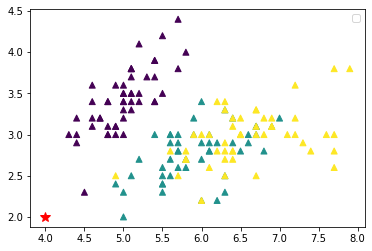

In [67]:
plt.scatter(data.data[:, 0], data.data[:, 1], marker='^', c=data.target)
plt.legend()
plt.plot(4, 2, 'r*', markersize=10)
plt.show()

## KNN classifier

In [373]:
import torch

In [333]:
class KNN():
  def __init__(self, n_neighbors):
    self.n_neighbors = n_neighbors

  def euclidean_dist(self, x1, x2):
    return -(torch.mean(torch.sqrt((x1 - x2)**2), dim=1))

  def fit(self, train_x, train_y):
    self.data_x = train_x
    self.data_y = train_y
  
  def top_neighbors(self, X, y, test_x):
    out = []

    for i in range(test_x.size(0)):
      dist = self.euclidean_dist(self.data_x.data, test_x[i])
      neighbor = ((self.data_y[dist.topk(self.n_neighbors, dim=0).indices]).sum())/self.n_neighbors

      out.append(neighbor.item())

    return out

  def predict(self, test_x):
    return self.top_neighbors(self.data_x, self.data_y, test_x)


## Comparing Results

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42, shuffle=True, stratify=data.target)

In [ ]:
x_train.shape, y_train.shape

In [295]:
#inputs for pytorch model
X = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)
X_ = torch.from_numpy(x_test)

Our Model

In [371]:
%time
knn_p = KNN(10)
knn_p.fit(X, y)
knn_p.predict(X_)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


[0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 2,
 1]

Sklearn's Model

In [372]:
%time
#sklearn's model
knn_s = KNeighborsClassifier(10)
knn_s.fit(x_train, y_train)
knn_s.predict(x_test)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.44 µs


array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])